In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
class bandit(object):
    def __init__(self,m):
        self.actual_mean=m
        self.actual_value=0
        self.current_mean=0
        self.counter=0

    def __pull__(self):
        val=np.random.randn()+self.actual_mean*1.0
        return val

    def update(self,value):
        self.counter+=1
        self.current_mean=(1.0-1.0/self.counter)*self.current_mean+(1.0/self.counter)*value


def conductExperiment(v1,v2,v3,epsilon,N):
    res=[]
    Bandits=[bandit(v1),bandit(v2),bandit(v3)]
    for i in range(N):
        val=np.random.randn()
        if val<epsilon:
            choice=np.random.choice(3)
        else:
            choice=np.argmax([b.current_mean for b in Bandits])
        value=Bandits[choice].__pull__()
        res.append(value)
        Bandits[choice].update(value)
    return res

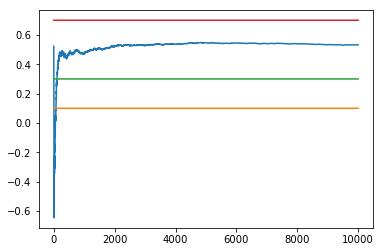

In [46]:
n=10000
res=conductExperiment(0.1,0.3,0.7,0.1,n)
cumaverage=np.cumsum(res)/(np.arange(n)+1)
plt.plot(cumaverage)
plt.plot(np.ones(n)*0.1)
plt.plot(np.ones(n)*0.3)
plt.plot(np.ones(n)*0.7)
